### Outlier Analysis

Please work in your section and suggest:
- Why the data is missing?
- Is there a pattern for missing data (by ZIP, day, year, etc)?
- Is it important?
- What are the next steps?

Drop these columns:

["Categorical_Snow_surface",
"Composite_reflectivity_entire_atmosphere",
"Graupel_snow_pellets_hybrid",
"Graupel_snow_pellets_isobaric",
"Snow_mixing_ratio_hybrid",
"Snow_mixing_ratio_isobaric"
'Geopotential_height_potential_vorticity_surface',
'u_component_of_wind_potential_vorticity_surface',
'v_component_of_wind_potential_vorticity_surface',
'Categorical_Ice_Pellets_surface',
'Ice_water_mixing_ratio_hybrid',
'Ice_water_mixing_ratio_isobaric',
'Precipitation_rate_surface',
'Vertical_velocity_geometric_isobaric',
'Ice_growth_rate_altitude_above_msl',
Land_sea_coverage_nearest_neighbor_land1sea0_surface]


Spatial Inputation:
[Snow_depth_surface,
'Haines_Index_surface',
'u_component_of_wind_altitude_above_msl',
'v_component_of_wind_altitude_above_msl']

### Wendy

- Pressure_potential_vorticity_surface has 385709 (99.1%) missing values
- Soil_temperature_depth_below_surface_layer has 5544 (1.4%) missing values
- Temperature_altitude_above_msl has 4321 (1.1%) missing values
- Temperature_potential_vorticity_surface has 385709 (99.1%) missing values
- Vertical_Speed_Shear_potential_vorticity_surface has 385709 (99.1%) missing values
- Visibility_surface has 69098 (17.7%) missing values
- Volumetric_Soil_Moisture_Content_depth_below_surface_layer has 5544 (1.4%) missing values
- Categorical_Freezing_Rain_surface has 316016 (81.2%) missing values
- Categorical_Rain_surface has 316016 (81.2%) missing values
- Cloud_mixing_ratio_hybrid has 316016 (81.2%) missing values
- Cloud_mixing_ratio_hybrid is highly skewed (γ1 = 27.69373963)
- Cloud_mixing_ratio_hybrid has 72199 (18.5%) zeros
- Rain_mixing_ratio_hybrid has 316016 (81.2%) missing values
- Rain_mixing_ratio_hybrid has 70260 (18.0%) zeros
- Rain_mixing_ratio_isobaric has 316016 (81.2%) missing values
- Total_cloud_cover_isobaric has 316016 (81.2%) missing values

## Ngan
- Geopotential_height_potential_vorticity_surface has 385709 (99.1%) missing values
- Haines_Index_surface has 6726 (1.7%) missing values
- u_component_of_wind_altitude_above_msl has 4321 (1.1%) missing values
- u_component_of_wind_potential_vorticity_surface has 385709 (99.1%) missing values
- v_component_of_wind_altitude_above_msl has 4321 (1.1%) missing values
- v_component_of_wind_potential_vorticity_surface has 385709 (99.1%) missing values
- Categorical_Ice_Pellets_surface has 316016 (81.2%) missing values
- Ice_water_mixing_ratio_hybrid has 316016 (81.2%) missing values
- Ice_water_mixing_ratio_hybrid is highly skewed (γ1 = 21.89943017)
- Ice_water_mixing_ratio_hybrid has 72756 (18.7%) zeros
- Ice_water_mixing_ratio_isobaric has 316016 (81.2%) missing values
- Precipitation_rate_surface has 316016 (81.2%) missing values
- Precipitation_rate_surface has 61001 (15.7%) zeros
- Vertical_velocity_geometric_isobaric has 316016 (81.2%) missing values
- Ice_growth_rate_altitude_above_msl has 369711 (95.0%) missing values
- Ice_growth_rate_altitude_above_msl has 19572 (5.0%) zeros!

We will drop variables with more than 80% of missing data. There are 9 of such including:
- Geopotential_height_potential_vorticity_surface has 385709 (99.1%) missing values
- u_component_of_wind_potential_vorticity_surface has 385709 (99.1%) missing values
- v_component_of_wind_potential_vorticity_surface has 385709 (99.1%) missing values
- Categorical_Ice_Pellets_surface has 316016 (81.2%) missing values
- Ice_water_mixing_ratio_hybrid has 316016 (81.2%) missing values
- Ice_water_mixing_ratio_isobaric has 316016 (81.2%) missing values
- Precipitation_rate_surface has 316016 (81.2%) missing values
- Vertical_velocity_geometric_isobaric has 316016 (81.2%) missing values
- Ice_growth_rate_altitude_above_msl has 369711 (95.0%) missing values

The remaining variables will be analyzed:
- Haines_Index_surface has 6726 (1.7%) missing values:
    - Observations:
        - zipcode 7008 have all values missing
        - zipcode 2722, 98421 and 98032 all have around 18% data missing
    - Imputation method: spatial imputation
        - Values seem to be the same for locations close to each other. Ex: zipcode 2722 has (lat = 41.5, long = -71) and have data very close to (lat = 41.5, long = -76).
        - It was suggested to impute missing data based on the closest lat long data given same date and time. 
    - Summary Data:
    
No. zip5	Haines_Index_surface    
0	7008	1.000000
1	2722	0.187225
2	98421	0.184851
3	98032	0.184679

- u_component_of_wind_altitude_above_msl has 4321 (1.1%) missing values & - v_component_of_wind_altitude_above_msl has 4321 (1.1%) missing values:
    - Observations:
        - (u,v) are missing in pair. 
        - zipcode 89506 have all values missing
    - Imputation method: spatial imputation
        - Values seem to be the same for locations close to each other. Ex: (lat = 30, long = -98) and have data very close to (lat = 29.5, long = -98.5) on January 2017.
        - It was suggested to impute missing data based on the closest lat long data given same date and time. 
    - Summary Data:

No  zip5	u_component_of_wind_altitude_above_msl
0	89506	1.0

Spatial vs Timewise Imputation
![title](spatialVStimewise_imputation.PNG)

In [65]:
#import libraries
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the merged data:
data = pd.read_hdf('data.h5')

In [3]:
data.head()

,date_key,zip5,impact_score,grid_lat,grid_lon,Date,Time,ForecastRange,x,y,...,Snow_mixing_ratio_hybrid,Snow_mixing_ratio_isobaric,Total_cloud_cover_isobaric,Vertical_velocity_geometric_isobaric,Ice_growth_rate_altitude_above_msl,density,state,Region,USR,Weekday
0,2017-01-01,2722,20.268081,41.5,-71.0,2017-01-01,0,0,578,97,...,NaN,NaN,NaN,NaN,NaN,0.0,MA,New England Northeast,Rural,6
1,2017-01-01,2722,20.268081,41.5,-71.0,2017-01-01,6,0,578,97,...,NaN,NaN,NaN,NaN,NaN,0.0,MA,New England Northeast,Rural,6
2,2017-01-01,2722,20.268081,41.5,-71.0,2017-01-01,12,0,578,97,...,NaN,NaN,NaN,NaN,NaN,0.0,MA,New England Northeast,Rural,6
3,2017-01-01,2722,20.268081,41.5,-71.0,2017-01-01,18,0,578,97,...,NaN,NaN,NaN,NaN,NaN,0.0,MA,New England Northeast,Rural,6
4,2017-01-02,2722,16.868994,41.5,-71.0,2017-01-02,0,0,578,97,...,NaN,NaN,NaN,NaN,NaN,0.0,MA,New England Northeast,Rural,0


In [4]:
# Drop 9 variables with more than 80% missing data
highMissingList = ['Geopotential_height_potential_vorticity_surface',\
                   'u_component_of_wind_potential_vorticity_surface',\
                   'v_component_of_wind_potential_vorticity_surface',\
                   'Categorical_Ice_Pellets_surface',\
                   'Ice_water_mixing_ratio_hybrid',\
                   'Ice_water_mixing_ratio_isobaric',\
                   'Precipitation_rate_surface',\
                   'Vertical_velocity_geometric_isobaric',\
                   'Ice_growth_rate_altitude_above_msl']
print('Data size before dropping high-data-misisng variables:', np.shape(data))
data = data.drop(highMissingList, axis = 1)
print('Data size AFTER dropping high-data-misisng variables:', np.shape(data))

Data size before dropping high-data-misisng variables: (389331, 128)
Data size AFTER dropping high-data-misisng variables: (389331, 119)


In [32]:
# Get list of interested features (those that have missing values less than 80%)
# nanList = [line.rstrip('\n') for line in open('nan_features_Ngan.txt')]
nanList = ['Haines_Index_surface',\
            'u_component_of_wind_altitude_above_msl',\
            'v_component_of_wind_altitude_above_msl']

# Append primary keys to the nanList
nanList = ['date_key','grid_lat','grid_lon','Time','zip5','state','Region','USR','impact_score'] + nanList

In [33]:
nanData = data[nanList]
nanData.head()

,date_key,grid_lat,grid_lon,Time,zip5,state,Region,USR,impact_score,Haines_Index_surface,u_component_of_wind_altitude_above_msl,v_component_of_wind_altitude_above_msl
0,2017-01-01,41.5,-71.0,0,2722,MA,New England Northeast,Rural,20.268081,4.0,25.209999,14.56
1,2017-01-01,41.5,-71.0,6,2722,MA,New England Northeast,Rural,20.268081,3.0,23.070000,15.06
2,2017-01-01,41.5,-71.0,12,2722,MA,New England Northeast,Rural,20.268081,3.0,16.990000,0.85
3,2017-01-01,41.5,-71.0,18,2722,MA,New England Northeast,Rural,20.268081,4.0,15.710000,-5.89
4,2017-01-02,41.5,-71.0,0,2722,MA,New England Northeast,Rural,16.868994,5.0,9.880000,-8.27


In [34]:
# Extract year, month and date from date_key
nanData['year'] = nanData['date_key'].apply(lambda x: x.strftime('%Y'))
nanData['month'] = nanData['date_key'].apply(lambda x: x.strftime('%B'))
nanData['date'] = nanData['date_key'].apply(lambda x: x.strftime('%d'))

C:\Users\MyPC\Anaconda3\envs\weather\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
nanData.head()

,date_key,grid_lat,grid_lon,Time,zip5,state,Region,USR,impact_score,Haines_Index_surface,u_component_of_wind_altitude_above_msl,v_component_of_wind_altitude_above_msl,year,month,date
0,2017-01-01,41.5,-71.0,0,2722,MA,New England Northeast,Rural,20.268081,4.0,25.209999,14.56,2017,January,01
1,2017-01-01,41.5,-71.0,6,2722,MA,New England Northeast,Rural,20.268081,3.0,23.070000,15.06,2017,January,01
2,2017-01-01,41.5,-71.0,12,2722,MA,New England Northeast,Rural,20.268081,3.0,16.990000,0.85,2017,January,01
3,2017-01-01,41.5,-71.0,18,2722,MA,New England Northeast,Rural,20.268081,4.0,15.710000,-5.89,2017,January,01
4,2017-01-02,41.5,-71.0,0,2722,MA,New England Northeast,Rural,16.868994,5.0,9.880000,-8.27,2017,January,02


In [38]:
#nanData.to_csv('nanData.csv')

In [39]:
#Get percentage of missing data group by zipcode
missingPerZip = (1-nanData.set_index("zip5").notnull().groupby(level=0).mean()).reset_index()

In [62]:
#Get list of zipcode and their corresponding data-missing percentage in descending order.
name = 'Haines_Index_surface'
name = 'u_component_of_wind_altitude_above_msl'

sort_missingPerZip = missingPerZip.sort_values([name], ascending = [0]).head(10)[['zip5',name]].reset_index(drop = True)
sort_missingPerZip[sort_missingPerZip[name] != 0]


,zip5,u_component_of_wind_altitude_above_msl
0,89506,1.0


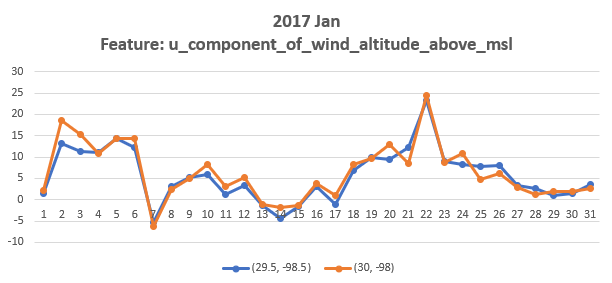

In [66]:
Image("spatialVStimewise_imputation.PNG")

## Chitwan
- impact_score has 132409 (34.0%) missing values
- Land_sea_coverage_nearest_neighbor_land1sea0_surface has 122793 (31.5%) missing values
- Snow_depth_surface has 5544 (1.4%) missing values
- Snow_depth_surface has 356611 (91.6%) zeros
- Water_equivalent_of_accumulated_snow_depth_surface has 356781 (91.6%) zeros
- Categorical_Snow_surface has 316016 (81.2%) missing values
- Composite_reflectivity_entire_atmosphere has 316016 (81.2%) missing values
- Graupel_snow_pellets_hybrid has 316016 (81.2%) missing values
- Graupel_snow_pellets_hybrid is highly skewed (γ1 = 73.26876449)
- Graupel_snow_pellets_hybrid has 73043 (18.8%) zeros
- Graupel_snow_pellets_isobaric has 316016 (81.2%) missing values
- Snow_mixing_ratio_hybrid has 316016 (81.2%) missing values
- Snow_mixing_ratio_hybrid is highly skewed (γ1 = 31.41715949)
- Snow_mixing_ratio_hybrid has 72934 (18.7%) zeros
- Snow_mixing_ratio_isobaric has 316016 (81.2%) missing values!

In [101]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
# Import the merged data:
data = pd.read_hdf('data.h5')

In [103]:
data.columns

Index(['date_key', 'zip5', 'impact_score', 'grid_lat', 'grid_lon', 'Date',
       'Time', 'ForecastRange', 'x', 'y',
       ...
       'Snow_mixing_ratio_hybrid', 'Snow_mixing_ratio_isobaric',
       'Total_cloud_cover_isobaric', 'Vertical_velocity_geometric_isobaric',
       'Ice_growth_rate_altitude_above_msl', 'density', 'state', 'Region',
       'USR', 'Weekday'],
      dtype='object', length=128)

In [104]:
missing = ["Land_sea_coverage_nearest_neighbor_land1sea0_surface",
"Snow_depth_surface",
"Water_equivalent_of_accumulated_snow_depth_surface",
"Categorical_Snow_surface",
"Composite_reflectivity_entire_atmosphere",
"Graupel_snow_pellets_hybrid",
"Graupel_snow_pellets_isobaric",
"Snow_mixing_ratio_hybrid",
"Snow_mixing_ratio_isobaric"]
identifiers = ["date_key", "zip5", "impact_score", "grid_lat", "grid_lon", "Time", "state", "Region"]

In [105]:
dirty = data[identifiers + missing]

In [61]:
dirty

,date_key,zip5,impact_score,grid_lat,grid_lon,Time,state,Region,Land_sea_coverage_nearest_neighbor_land1sea0_surface,Snow_depth_surface,Water_equivalent_of_accumulated_snow_depth_surface,Categorical_Snow_surface,Composite_reflectivity_entire_atmosphere,Graupel_snow_pellets_hybrid,Graupel_snow_pellets_isobaric,Snow_mixing_ratio_hybrid,Snow_mixing_ratio_isobaric
0,2017-01-01,2722,20.268081,41.5,-71.0,0,MA,New England Northeast,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,2722,20.268081,41.5,-71.0,6,MA,New England Northeast,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,2722,20.268081,41.5,-71.0,12,MA,New England Northeast,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,2722,20.268081,41.5,-71.0,18,MA,New England Northeast,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-02,2722,16.868994,41.5,-71.0,0,MA,New England Northeast,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389326,2019-12-30,98421,NaN,47.5,-122.5,18,WA,Pacific West,1.0,0.0,0.0,0.0,-20.000004,0.0,2.990000e-09,0.0,2.890000e-09
389327,2019-12-31,98421,NaN,47.5,-122.5,0,WA,Pacific West,1.0,0.0,0.0,0.0,-18.260004,0.0,3.151257e-09,0.0,3.051257e-09
389328,2019-12-31,98421,NaN,47.5,-122.5,6,WA,Pacific West,1.0,0.0,0.0,0.0,13.899997,0.0,3.120000e-09,0.0,3.020000e-09
389329,2019-12-31,98421,NaN,47.5,-122.5,12,WA,Pacific West,1.0,0.0,0.0,0.0,14.509996,0.0,3.390000e-09,0.0,3.270000e-09


In [62]:
dirty.to_csv("dirty.csv")

In [63]:
dirty[dirty["Land_sea_coverage_nearest_neighbor_land1sea0_surface"] ==  1]["zip5"].unique()

array([ 2722,  3063,  8085,  8512,  8518,  8691,  8817, 17013, 17015,
       17339, 18031, 18045, 18202, 18640, 18707, 19709, 20166, 21224,
       23803, 23836, 28214, 29172, 29303, 29418, 30144, 30291, 30517,
       32218, 32221, 33182, 33572, 33811, 37090, 37127, 37321, 37421,
       40165, 40218, 40511, 41048, 42718, 43062, 43125, 43207, 46075,
       46168, 46231, 47130, 48150, 53144, 53703, 53718, 55379, 60433,
       60436, 60446, 60449, 62025, 66030, 66102, 66219, 67337, 75019,
       75241, 76177, 77090, 78154, 78666, 80216, 85043, 85338, 85353,
       89030, 89115, 89434, 89506, 91752, 92374, 92376, 92408, 92551,
       95304, 95363, 95391, 95837, 97124, 98032, 98327, 98390, 98421])

In [64]:
dirty[dirty["Land_sea_coverage_nearest_neighbor_land1sea0_surface"] ==  0]["zip5"].unique()

array([2722, 7008])

In [65]:
dirty[pd.isna(dirty["Land_sea_coverage_nearest_neighbor_land1sea0_surface"])]["zip5"].unique()

array([ 2722,  3063,  7008,  8085,  8512,  8518,  8691,  8817, 17013,
       17015, 17339, 18031, 18045, 18202, 18640, 18707, 19709, 20166,
       21224, 23803, 23836, 28214, 29172, 29303, 29418, 30144, 30291,
       30517, 32218, 32221, 33182, 33572, 33811, 37090, 37127, 37321,
       37421, 40165, 40218, 40511, 41048, 42718, 43062, 43125, 43207,
       46075, 46168, 46231, 47130, 48150, 53144, 53703, 53718, 55379,
       60433, 60436, 60446, 60449, 62025, 66030, 66102, 66219, 67337,
       75019, 75241, 76177, 77090, 78154, 78666, 80216, 85043, 85338,
       85353, 89030, 89115, 89434, 89506, 91752, 92374, 92376, 92408,
       92551, 95304, 95363, 95391, 95837, 97124, 98032, 98327, 98390,
       98421])

In [66]:
dirty[dirty["zip5"] == 3063][["zip5", "date_key", "Land_sea_coverage_nearest_neighbor_land1sea0_surface"]]

,zip5,date_key,Land_sea_coverage_nearest_neighbor_land1sea0_surface
4321,3063,2017-01-01,NaN
4322,3063,2017-01-01,NaN
4323,3063,2017-01-01,NaN
4324,3063,2017-01-01,NaN
4325,3063,2017-01-02,NaN
...,...,...,...
8329,3063,2019-10-15,NaN
8330,3063,2019-10-16,NaN
8331,3063,2019-10-16,NaN
8332,3063,2019-10-16,NaN


Features with 80-100% missing values are difficult to impute. Let's drop those columns: 

["Categorical_Snow_surface",
"Composite_reflectivity_entire_atmosphere",
"Graupel_snow_pellets_hybrid",
"Graupel_snow_pellets_isobaric",
"Snow_mixing_ratio_hybrid",
"Snow_mixing_ratio_isobaric"]

#### Land_sea_coverage_nearest_neighbor_land1sea0_surface is 1 for all land neighbors and 0 for a sea border

So I'm not 100% certain what this column means, but I am assuming that it is static over time - either a zipcode has all land borders or it has a sea border? I tried to look up a few zipcodes and it didn't follow this pattern.

All zipcodes have NA values for 1/1/17-7/18/17 and 6/13/19-12/31/19. All zipcodes except 02722 have only 1 non-NA value. I backfilled for missing data 1/1/17-7/18/17 for all zipcodes. 02722 will be a special case where the value switches from 1 to 0.

In [99]:
## Filling in missing data for Land_sea_coverage_nearest_neighbor_land1sea0_surface
clean0 = dirty
clean0["Land_sea_coverage_nearest_neighbor_land1sea0_surface"] = clean0.groupby("zip5").\
    transform(lambda x: x.fillna(x.mean()))["Land_sea_coverage_nearest_neighbor_land1sea0_surface"]


/Users/chitwan/anaconda/envs/weather/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
# Maually change values for zip5 = 02722
# Somthing funky is happeneing, return to this...
clean0.loc[:, (clean0["date_key"] < "2017-07-19") & (clean0['zip5'] == 2722)]\
    ["Land_sea_coverage_nearest_neighbor_land1sea0_surface"] = 1

clean0.loc[(clean0["date_key"] >= "2019-06-13") & (clean0['zip5'] == 2722)]\
    ["Land_sea_coverage_nearest_neighbor_land1sea0_surface"] = 0

clean0

/Users/chitwan/anaconda/envs/weather/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chitwan/anaconda/envs/weather/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_key,zip5,impact_score,grid_lat,grid_lon,Time,state,Region,Land_sea_coverage_nearest_neighbor_land1sea0_surface,Snow_depth_surface,Water_equivalent_of_accumulated_snow_depth_surface,Categorical_Snow_surface,Composite_reflectivity_entire_atmosphere,Graupel_snow_pellets_hybrid,Graupel_snow_pellets_isobaric,Snow_mixing_ratio_hybrid,Snow_mixing_ratio_isobaric
0,2017-01-01,2722,20.268081,41.5,-71.0,0,MA,New England Northeast,0.925648,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,2722,20.268081,41.5,-71.0,6,MA,New England Northeast,0.925648,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,2722,20.268081,41.5,-71.0,12,MA,New England Northeast,0.925648,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,2722,20.268081,41.5,-71.0,18,MA,New England Northeast,0.925648,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-02,2722,16.868994,41.5,-71.0,0,MA,New England Northeast,0.925648,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389326,2019-12-30,98421,NaN,47.5,-122.5,18,WA,Pacific West,1.000000,0.0,0.0,0.0,-20.000004,0.0,2.990000e-09,0.0,2.890000e-09
389327,2019-12-31,98421,NaN,47.5,-122.5,0,WA,Pacific West,1.000000,0.0,0.0,0.0,-18.260004,0.0,3.151257e-09,0.0,3.051257e-09
389328,2019-12-31,98421,NaN,47.5,-122.5,6,WA,Pacific West,1.000000,0.0,0.0,0.0,13.899997,0.0,3.120000e-09,0.0,3.020000e-09
389329,2019-12-31,98421,NaN,47.5,-122.5,12,WA,Pacific West,1.000000,0.0,0.0,0.0,14.509996,0.0,3.390000e-09,0.0,3.270000e-09


### Snow_depth_surface

Snow_depth_surface = Snow depth @ Ground or water surface. Most values are 0 which is not unexpected but let's investigate the 1.4% missing values.

In [108]:
dirty[pd.isna(dirty["Snow_depth_surface"])]["zip5"].unique()

array([ 2722,  7008, 98032, 98421])

These 4 zipcodes are missing every single datapoint for snow_depth_surface. I 

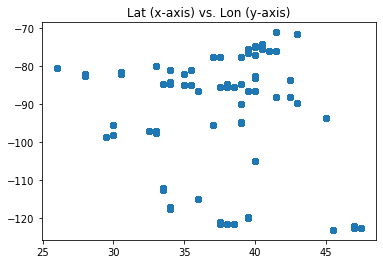

In [115]:
plt.scatter(dirty["grid_lat"], dirty["grid_lon"])
plt.title("Lat (x-axis) vs. Lon (y-axis)")
plt.show()

### Impact Scores

In [127]:
dirty.loc[dirty["impact_score"] == -1].count()/dirty.count()

date_key                                                0.073965
zip5                                                    0.073965
impact_score                                            0.112085
grid_lat                                                0.073965
grid_lon                                                0.073965
Time                                                    0.073965
state                                                   0.073965
Region                                                  0.073965
Land_sea_coverage_nearest_neighbor_land1sea0_surface    0.071296
Snow_depth_surface                                      0.073142
Water_equivalent_of_accumulated_snow_depth_surface      0.074569
Categorical_Snow_surface                                0.000000
Composite_reflectivity_entire_atmosphere                0.000000
Graupel_snow_pellets_hybrid                             0.000000
Graupel_snow_pellets_isobaric                           0.000000
Snow_mixing_ratio_hybrid 

In [119]:
dirty.loc[dirty["impact_score"] == -1]["zip5"].unique()

array([ 3063,  8085,  8512,  8817, 18707, 20166, 29418, 30144, 32218,
       32221, 33182, 40218, 43207, 48150, 53703, 53718, 60449, 66102,
       66219, 67337, 77090, 80216, 89115, 89434, 95837, 97124, 98421])

These 27 zips have atlesat one "-1" value. 